(517, 3) (130, 3) (517,) (130,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 3         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at h

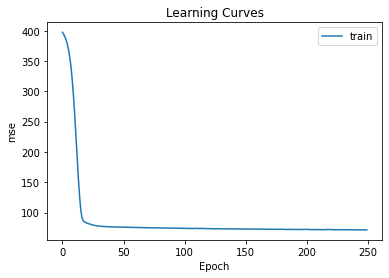

MSE: 75.352, RMSE: 8.681
Predicted: 17.528


In [10]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot

# load the dataset
path = 'data/dummy_data_reg.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

model.summary()

plot_model(model, 'model.png', show_shapes=True)

# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, verbose=0)
# evaluate the model
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mse')
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['mse'], label='val')
pyplot.legend()
pyplot.show()

error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [ 0.31297685299775824, 0.6732171169173827, 0.013806030084858988]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)
model.save('model.h5')